<a href="https://colab.research.google.com/github/subhamChakraborty23/Movie-recommendation-model/blob/master/Movie_recommendation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduction**
Recommender Systems:

1.   User Based Recommender Systems
2.   Item Based Recommender Systems


- What is recommender System?

Based on previous(past) behaviours, it predicts the likelihood that a user would prefer an item.
For example, Netflix uses recommendation system. It suggest people new movies according to their past activities that are like watching and voting movies.
The purpose of recommender systems is recommending new things that are not seen before from people.


1. **Content Filtering:**
In this algorithm, we try finding items look alike. Once we have item look like matrix,

  we can easily recommend alike items to a customer, who has purchased any item from the store.

2. **Collaborative Filtering:**
  Here, we try to search for look alike customers and offer products based on what his/her lookalike has chosen.

  This algorithm is very effective but takes a lot of time and resources.

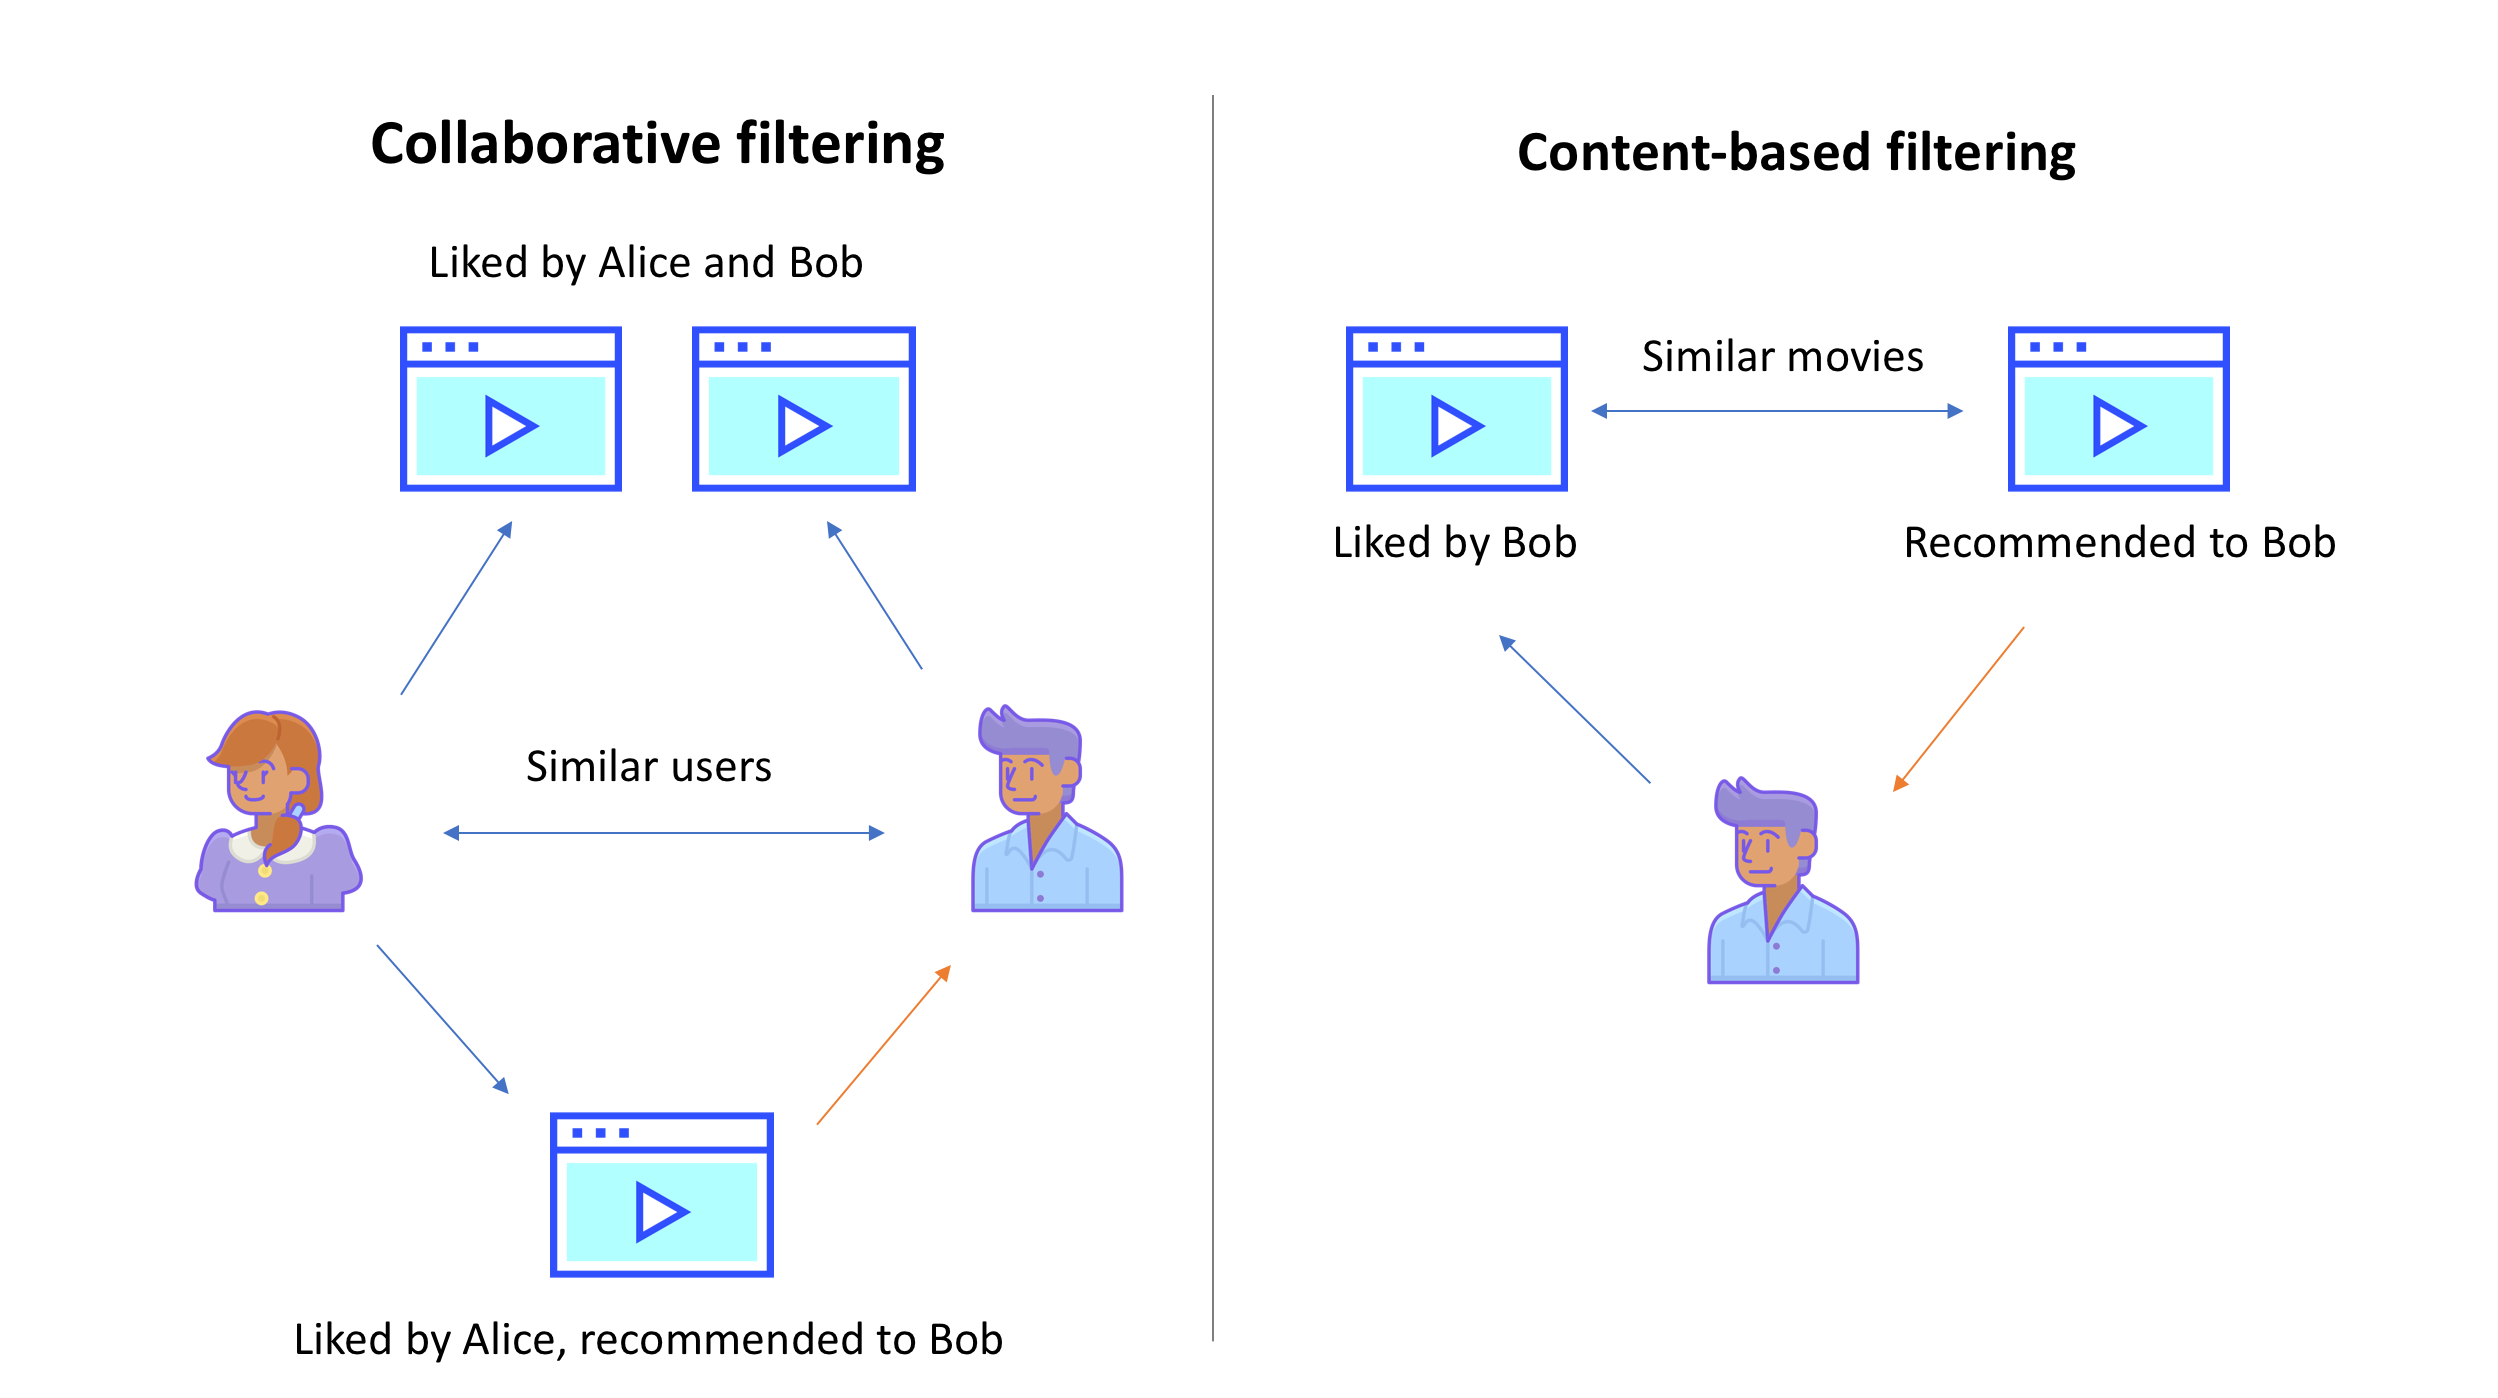

## Import Libraries:

In [ ]:
# import packages
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import scipy.sparse as sparse
import xgboost as xgb
import sklearn
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold,train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path


from keras.layers.merge import dot
from keras.models import Model

from xgboost import XGBRegressor



In [ ]:
rating=pd.read_csv("/content/drive/My Drive/movie/rating.csv")
tag=pd.read_csv("/content/drive/My Drive/movie/tag.csv")
movie=pd.read_csv("/content/drive/My Drive/movie/movie.csv")
link=pd.read_csv("/content/drive/My Drive/movie/datasets_339_77759_link.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##**Exploring The Data** **(EDA)**:

In [ ]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [ ]:
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
train = rating

In [ ]:
df = train.copy()

In [ ]:
df.head()

,userId,movieId,rating,timestamp
960,11,1,4.5,2009-01-02 01:13:41
961,11,10,2.5,2009-01-02 01:15:59
962,11,19,3.5,2009-01-01 04:21:44
963,11,32,5.0,2009-01-01 04:11:35
964,11,39,4.5,2009-01-02 01:17:12


In [ ]:
rating.shape

(20000263, 4)

In [ ]:
rating['userId'].value_counts().shape

(138493,)

In [ ]:
x=rating['userId'].value_counts()>500

In [ ]:
y = x[x].index

In [ ]:
y.shape

(7441,)

In [ ]:
rating=rating[rating['userId'].isin(y)]

In [ ]:
rating.shape

(6554416, 4)

This is the cleaned modified version of the dataset and using this we can generate differentsubsets of the dataset i.e, for collaborative filtering and for content based filtering we can use its subsets.

In [ ]:
movie_details=movie.merge(rating,on='movieId')
movie_details.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0,2001-07-04 07:02:29
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,54,4.0,2000-11-21 21:00:21
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0,2006-04-03 10:00:08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,91,4.0,2005-03-22 22:46:02


In [ ]:
movie_details.drop(columns=['timestamp'],inplace=True)

In [ ]:
movie_details.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,54,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,91,4.0


In [ ]:
movie_details.describe()

,movieId,userId,rating
count,6.554416e+06,6.554416e+06,6.554416e+06
mean,1.239511e+04,6.871715e+04,3.339357e+00
std,2.316712e+04,4.010538e+04,1.037397e+00
min,1.000000e+00,1.100000e+01,5.000000e-01
25%,1.381000e+03,3.415600e+04,3.000000e+00
50%,3.100000e+03,6.898500e+04,3.500000e+00
75%,6.493000e+03,1.031810e+05,4.000000e+00
max,1.312620e+05,1.384740e+05,5.000000e+00


## **Collaborative Filtering:**

### **User Based Collaborative Filtering**

Collaborative filtering is making recommend according to combination of your experience and experiences of other people.
- First we need to make user vs item matrix.
Each row is users and each columns are items like movie, product or websites
- Secondly, computes similarity scores between users.
Each row is users and each row is vector.
Compute similarity of these rows (users).
-Thirdly, find users who are similar to you based on past behaviours
- Finally, it suggests that you are not experienced before.

In [ ]:
df2=movie_details.copy()

In [ ]:
df2.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Oranges (2004)                                            5.0
Stuck Between Stations (2011)                             5.0
Reel Bad Arabs: How Hollywood Vilifies a People (2006)    5.0
Dead Time: Kala (2007)                                    5.0
Only Daughter (2013)                                      5.0
Name: rating, dtype: float64

In [ ]:
df2.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Matrix, The (1999)           6938
Forrest Gump (1994)          6870
Jurassic Park (1993)         6824
Back to the Future (1985)    6807
Pulp Fiction (1994)          6767
Name: rating, dtype: int64

In [ ]:
rating2 = pd.DataFrame(df2.groupby('title')['rating'].mean())
rating2.head()

,rating
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.000000
$ (Dollars) (1971),3.142857
$5 a Day (2008),3.050000
$9.99 (2008),2.970588
$ellebrity (Sellebrity) (2012),3.500000


Now set the number of ratings column:

In [ ]:
rating2['num of ratings'] = pd.DataFrame(df2.groupby('title')['rating'].count())
rating2.head()

,rating,num of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.000000,2
$ (Dollars) (1971),3.142857,7
$5 a Day (2008),3.050000,10
$9.99 (2008),2.970588,17
$ellebrity (Sellebrity) (2012),3.500000,1


**Data visualization**

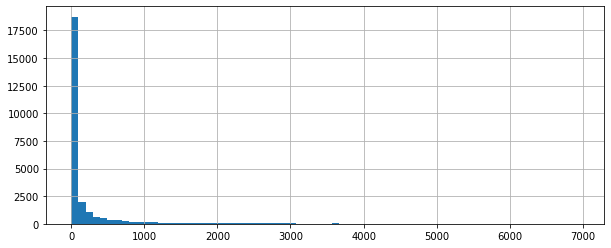

In [ ]:
plt.figure(figsize=(10,4))
rating2['num of ratings'].hist(bins=70)

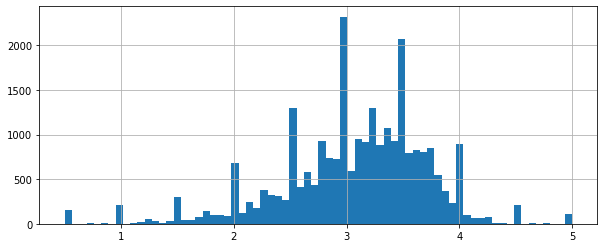

In [ ]:
plt.figure(figsize=(10,4))
rating2['rating'].hist(bins=70)

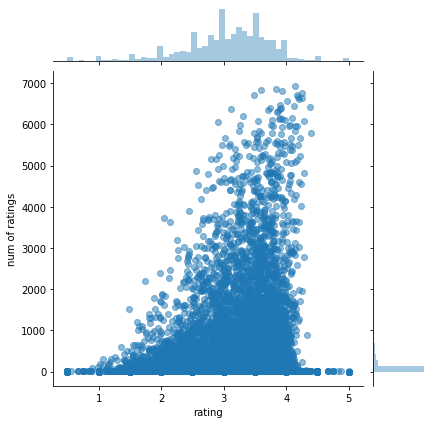

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data=rating2,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## **Recommending Similar Movies**
Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

**User based collaborative filtering has some problems**

- In this system, each row of matrix is user. Therefore, comparing and finding similarity between of them is computationaly hard and spend too much computational power.
- Also, habits of people can be changed. Therefore making correct and useful recommendation can be hard in time.
In order to solve these problems, lets look at another recommender system that is item based collaborative filtering

### **Item Based Collaborative Filtering**
- In this system, instead of finding relationship between users, used items like movies or stuffs are compared with each others.
- In user based recommendation systems, habits of users can be changed. This situation makes hard to recommendation. However, in item based recommendation systems, movies or stuffs does not change. Therefore recommendation is easier.
-On the other hand, there are almost 7 billion people all over the world. Comparing people increases the computational power. However, if items are compared, computational power is less.
- In item based recommendation systems, we need to make user vs item matrix that we use also in user based recommender systems.
 - Each row is user and each column is items like movie, product or websites.
 -However, at this time instead of calculating similarity between rows, we need to calculate similarity between columns that are items like movies or stuffs.

Encoding the columns:

In [ ]:
df2.userId = df2.userId.astype('category').cat.codes.values
df2.movieId = df2.movieId.astype('category').cat.codes.values

In [ ]:
df2['userId'].value_counts(ascending=True)

6700     501
2851     501
1568     501
1795     501
4952     501
        ... 
6788    5491
6548    5520
4464    5646
467     7515
6373    9254
Name: userId, Length: 7441, dtype: int64

In [ ]:
df2['movieId'].unique()

array([    0,     1,     2, ..., 26044, 26045, 26046], dtype=int16)

In [ ]:
# creating utility matrix.
index=list(df2['userId'].unique())
columns=list(df2['movieId'].unique())
index=sorted(index)
columns=sorted(columns)
moviemat = df2.pivot_table(values='rating',index='userId',columns='title')
moviemat.head()

title,#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(A)sexual (2011),(Absolutions) Pipilotti's Mistakes ((Entlastungen) Pipilottis Fehler) (1988),(Untitled) (2009),*batteries not included (1987),+1 (2013),"...All the Marbles (California Dolls, The) (1981)",...And God Spoke (1993),...And Justice for All (1979),...tick... tick... tick... (1970),.45 (2006),009 Re: Cyborg (2012),1 (2013),"1, 2, 3, Sun (Un, deuz, trois, soleil) (1993)",1-900 (06) (1994),10 (1979),10 000 timmar (2014),10 Items or Less (2006),10 MPH (2007),10 Questions for the Dalai Lama (2006),10 Rillington Place (1971),10 Things I Hate About You (1999),10 Years (2011),10 minutes (10 minuta) (2002),...,Zoo in Budapest (1933),Zookeeper (2011),Zoolander (2001),Zoom (2006),Zoot Suit (1981),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),Zorro (1975),"Zorro, the Gay Blade (1981)",Zotz! (1962),Zouzou (1934),Zozo (2005),Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983),Zulu (1964),Zulu (2013),Zulu Dawn (1979),Zus & Zo (2001),Zuzu Angel (2006),[REC] (2007),[REC] 4: Apocalypse (2014),[REC]² (2009),[REC]³ 3 Génesis (2012),"\\""Great Performances\""\"" Cats (1998)""",a/k/a Tommy Chong (2005),alaskaLand (2013),eXistenZ (1999),i hate myself :) (2013),iSteve (2013),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),"¡Alambrista! (Illegal, The) (1977)",¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Åsa-Nisse - Wälkom to Knohult (2011),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
moviemat.shape

(7441, 26034)

In [ ]:
moviemat.fillna(0,inplace=True)

In [ ]:
moviemat

title,#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(A)sexual (2011),(Absolutions) Pipilotti's Mistakes ((Entlastungen) Pipilottis Fehler) (1988),(Untitled) (2009),*batteries not included (1987),+1 (2013),"...All the Marbles (California Dolls, The) (1981)",...And God Spoke (1993),...And Justice for All (1979),...tick... tick... tick... (1970),.45 (2006),009 Re: Cyborg (2012),1 (2013),"1, 2, 3, Sun (Un, deuz, trois, soleil) (1993)",1-900 (06) (1994),10 (1979),10 000 timmar (2014),10 Items or Less (2006),10 MPH (2007),10 Questions for the Dalai Lama (2006),10 Rillington Place (1971),10 Things I Hate About You (1999),10 Years (2011),10 minutes (10 minuta) (2002),...,Zoo in Budapest (1933),Zookeeper (2011),Zoolander (2001),Zoom (2006),Zoot Suit (1981),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),Zorro (1975),"Zorro, the Gay Blade (1981)",Zotz! (1962),Zouzou (1934),Zozo (2005),Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983),Zulu (1964),Zulu (2013),Zulu Dawn (1979),Zus & Zo (2001),Zuzu Angel (2006),[REC] (2007),[REC] 4: Apocalypse (2014),[REC]² (2009),[REC]³ 3 Génesis (2012),"\\""Great Performances\""\"" Cats (1998)""",a/k/a Tommy Chong (2005),alaskaLand (2013),eXistenZ (1999),i hate myself :) (2013),iSteve (2013),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),"¡Alambrista! (Illegal, The) (1977)",¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Åsa-Nisse - Wälkom to Knohult (2011),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## **collaborative recommendation using correlation as a parameter:**

In [ ]:
rating2.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
"Matrix, The (1999)",4.145287,6938
Forrest Gump (1994),3.843304,6870
Jurassic Park (1993),3.603898,6824
Back to the Future (1985),3.932496,6807
Pulp Fiction (1994),4.256391,6767
"Silence of the Lambs, The (1991)",4.166914,6725
Men in Black (a.k.a. MIB) (1997),3.488147,6707
Star Wars: Episode IV - A New Hope (1977),4.187359,6653
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),4.246797,6635


**Most rated movies**

In [ ]:
rating2.head()

,rating,num of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.000000,2
$ (Dollars) (1971),3.142857,7
$5 a Day (2008),3.050000,10
$9.99 (2008),2.970588,17
$ellebrity (Sellebrity) (2012),3.500000,1


In [ ]:

starwars_user_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

userId
0    5.0
1    5.0
2    4.0
3    0.0
4    4.5
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [ ]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [ ]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.head()

,Correlation
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),0.005439
$ (Dollars) (1971),0.013928
$5 a Day (2008),-0.008028
$9.99 (2008),0.003377
$ellebrity (Sellebrity) (2012),-0.005653


## **Final recommended movies:**


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [ ]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Star Wars: Episode IV - A New Hope (1977),1.000000
Star Wars: Episode V - The Empire Strikes Back (1980),0.757108
Star Wars: Episode VI - Return of the Jedi (1983),0.691013
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.450767
Star Wars: Episode I - The Phantom Menace (1999),0.438021
Indiana Jones and the Last Crusade (1989),0.408581
"Terminator, The (1984)",0.329280
Indiana Jones and the Temple of Doom (1984),0.323110
Ghostbusters (a.k.a. Ghost Busters) (1984),0.316474



Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [ ]:
corr_starwars = corr_starwars.join(rating2['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),0.005439,2
$ (Dollars) (1971),0.013928,7
$5 a Day (2008),-0.008028,10
$9.99 (2008),0.003377,17
$ellebrity (Sellebrity) (2012),-0.005653,1


Now sort the values and notice how the titles make a lot more sense:

In [ ]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,6653
Star Wars: Episode V - The Empire Strikes Back (1980),0.757108,6607
Star Wars: Episode VI - Return of the Jedi (1983),0.691013,6460
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.450767,6635
Star Wars: Episode I - The Phantom Menace (1999),0.438021,6048


##**Using KNN algorithm for recommendation:**

In [ ]:
from scipy.sparse import csr_matrix
movie_sparse=csr_matrix(moviemat)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors( n_neighbors=10,algorithm='brute',metric='cosine')#cosine similarity

In [ ]:
model.fit(movie_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [ ]:
df2.head()

,movieId,title,genres,userId,rating
0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,4.5
1,9,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,4.0
2,18,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,4.0
3,31,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,5.0
4,38,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,4.0


In this case we don't require the genre,userid and rating as we are going to predict the recommendation with respect to the user's choice.

In [ ]:
df2.drop(columns=['genres','userId','rating'],inplace=True)

In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
df2.head()

,movieId,title
0,0,Toy Story (1995)
1,9,Toy Story (1995)
2,18,Toy Story (1995)
3,31,Toy Story (1995)
4,38,Toy Story (1995)


In [ ]:
df2.to_csv('codf.csv',index=False)

In [ ]:
distances,suggestions=model.kneighbors(moviemat.iloc[540,:].values.reshape(1,-1))

As we know that KNN uses euqlidean distance so, we can get the suggested movies using this feature for finding the similarities.

In [ ]:
distances

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.2721909, 0.3364639, 1.       , 1.       ]])

In [ ]:
suggestions

array([[ 537,  540,  539,  542,  541,  538,  536,  543, 4962, 4964]])

In [ ]:
df1=df2.copy()
ti=[]
for i in df1['title']:
    ti.append(i.split(' (')[0])
df1['title']=ti

In [ ]:
for i in range(len(suggestions)):
    print(moviemat.index[suggestions[i]])

Int64Index([537, 540, 539, 542, 541, 538, 536, 543, 4962, 4964], dtype='int64', name='userId')


In [ ]:
#function for recommending the movies
def reco(movie_name):
    movie_id=df1[df1['title']=='Toy Story (1995)'].drop_duplicates('title')['movieId'].values[0]
    distances,suggestions=model.kneighbors(moviemat.iloc[movie_id,:].values.reshape(1,-1))
    
    for i in range(len(suggestions)):
        return (moviemat.index[suggestions[i]])

In [ ]:
title=movie_details['title']

In [ ]:
title.head()

0    Toy Story (1995)
1    Toy Story (1995)
2    Toy Story (1995)
3    Toy Story (1995)
4    Toy Story (1995)
Name: title, dtype: object

## **Recommended movies using Collaborative filtering Algorithm:**

These are the top 10 recommended movies according to the user's current watched movies watched and in this case the movie is "It conquered the world" .

In [ ]:
res=reco("")#output

In [ ]:
for i in res:
  print(title[i])

Toy Story (1995)
Toy Story (1995)
Toy Story (1995)
Toy Story (1995)
Toy Story (1995)
Toy Story (1995)
Toy Story (1995)
Toy Story (1995)
Toy Story (1995)
Toy Story (1995)


## **Using Keras Embedding technique :**

In [ ]:
df_movie=rating.copy()

In [ ]:
df_movie.drop(columns=['timestamp'],inplace=True)

In [ ]:
df_movie.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [ ]:
user_ids = df_movie["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df_movie["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df_movie["user"] = df_movie["userId"].map(user2user_encoded)
df_movie["movie"] = df_movie["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df_movie["rating"] = df_movie["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df_movie["rating"])
max_rating = max(df_movie["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 138493, Number of Movies: 26744, Min rating: 0.5, Max rating: 5.0


In [ ]:
df_movie = df_movie.sample(frac=0.5, random_state=42)
x = df_movie[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df_movie["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 70% of the data and validating on 30%.
train_indices = int(0.7 * df_movie.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

### **Create the model**
We embed both users and movies in to 50-dimensional vectors.

The model computes a match score between user and movie embeddings via a dot product, and adds a per-movie and per-user bias. The match score is scaled to the [0, 1] interval via a sigmoid (since our ratings are normalized to this range).

In [ ]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model_k = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model_k.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)

**Train the model based on the data split**

In [ ]:
history = model_k.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

**Plot training and validation loss**

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

**Show top 10 movie recommendations to a user**

In [ ]:
movie_df =movie.copy

# Let us get a user and see the top recommendations.
user_id = df_movie.userId.sample(1).iloc[0]
movies_watched_by_user = df_movie[df_movie.userId == user_id]
movies_not_watched = movie_df[
    ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

## **Content Based Filtering Recommendation model:**

**EDA**

In [ ]:
movie_details2=movie.merge(rating,on='movieId')

In [ ]:
movie_details2.drop(columns=['timestamp'],inplace=True)

In [ ]:
movie_details2.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,54,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,91,4.0


In [ ]:
movie_details2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6554416 entries, 0 to 6554415
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   movieId  int64  
 1   title    object 
 2   genres   object 
 3   userId   int64  
 4   rating   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 300.0+ MB


In [ ]:
movie_details2.describe()

,movieId,userId,rating
count,6.554416e+06,6.554416e+06,6.554416e+06
mean,1.239511e+04,6.871715e+04,3.339357e+00
std,2.316712e+04,4.010538e+04,1.037397e+00
min,1.000000e+00,1.100000e+01,5.000000e-01
25%,1.381000e+03,3.415600e+04,3.000000e+00
50%,3.100000e+03,6.898500e+04,3.500000e+00
75%,6.493000e+03,1.031810e+05,4.000000e+00
max,1.312620e+05,1.384740e+05,5.000000e+00


In [ ]:
movie_details2.shape

(6554416, 5)

In [ ]:
total_ratings=movie_details2.groupby(['movieId','genres']).sum()['rating'].reset_index()

In [ ]:
df3=movie_details2.copy()

In [ ]:
df3.drop_duplicates(['title','genres'],inplace=True) 

In [ ]:
df3=df3.merge(total_ratings,on='movieId')

In [ ]:
df3.drop(columns=['userId','rating_x','genres_y'],inplace=True)

In [ ]:
df3.rename(columns={'genres_x':'genres','rating_y':'rating'},inplace=True)

In [ ]:
df3.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24289.5
1,2,Jumanji (1995),Adventure|Children|Fantasy,13612.5
2,3,Grumpier Old Men (1995),Comedy|Romance,6351.5
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1660.0
4,5,Father of the Bride Part II (1995),Comedy,5294.5


In [ ]:
df3['rating']=df3['rating'].astype(int)

In [ ]:
df3.dtypes

movieId     int64
title      object
genres     object
rating      int64
dtype: object

In [ ]:
df3.shape

(26043, 4)

Encoding the categorical values(genres) using tfidf vectorizer : 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=1)
x = tfv.fit_transform(df3['genres'])

In [ ]:
x

<26043x191 sparse matrix of type '<class 'numpy.float64'>'
	with 83177 stored elements in Compressed Sparse Row format>

In [ ]:
print(x)

  (0, 69)	0.39904573206119653
  (0, 52)	0.37422724672524593
  (0, 38)	0.38317290006486804
  (0, 20)	0.40370152354133687
  (0, 118)	0.2995112475306448
  (0, 65)	0.16521905230857048
  (0, 51)	0.3167085779100032
  (0, 37)	0.3237601968913999
  (0, 19)	0.26227994399577675
  (1, 56)	0.5684868693639745
  (1, 21)	0.5357094730244757
  (1, 118)	0.36759649554960244
  (1, 51)	0.38870314323773
  (1, 19)	0.3219017284348526
  (2, 75)	0.7746641344266586
  (2, 174)	0.5052785281115435
  (2, 65)	0.3802487184231234
  (3, 113)	0.5530838794516152
  (3, 68)	0.5447317087566552
  (3, 106)	0.2699692701520767
  (3, 174)	0.45514840206777923
  (3, 65)	0.3425231569317731
  (4, 65)	1.0
  (5, 91)	0.5980390374845853
  (5, 5)	0.5484522594415456
  :	:
  (26035, 52)	0.37422724672524593
  (26035, 38)	0.38317290006486804
  (26035, 20)	0.40370152354133687
  (26035, 118)	0.2995112475306448
  (26035, 65)	0.16521905230857048
  (26035, 51)	0.3167085779100032
  (26035, 37)	0.3237601968913999
  (26035, 19)	0.26227994399577675
  (

In [ ]:
x.shape

(26739, 191)

for training i am using the sigmoid kernel which is used in Logistic regression and also as an activation function in Neural networks.

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel
model = sigmoid_kernel(x, x)

In [ ]:
model[0]

array([0.76378422, 0.76229169, 0.76173226, ..., 0.76217026, 0.76159416,
       0.76203185])

In [ ]:
# Reverse mapping of indices and movie titles
indices = pd.Series(df3.index, index=df3['title']).drop_duplicates()

In [ ]:
indices

title
Toy Story (1995)                          0
Jumanji (1995)                            1
Grumpier Old Men (1995)                   2
Waiting to Exhale (1995)                  3
Father of the Bride Part II (1995)        4
                                      ...  
Kein Bund für's Leben (2007)          26038
Feuer, Eis & Dosenbier (2002)         26039
The Pirates (2014)                    26040
Rentun Ruusu (2001)                   26041
Innocence (2014)                      26042
Length: 26043, dtype: int64

In [ ]:
indices['The Pirates (2014)']

26040

In [ ]:
model[26040]

array([0.76217026, 0.76230105, 0.76159416, ..., 0.76378422, 0.76159416,
       0.76231807])

In [ ]:
list(enumerate(model[indices['The Pirates (2014)']]))

[(0, 0.7621702590998967),
 (1, 0.7623010514385448),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615941559557649),
 (7, 0.7625541700250389),
 (8, 0.7615941559557649),
 (9, 0.7623670402671985),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7623479636431254),
 (13, 0.7615941559557649),
 (14, 0.7623516367633618),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7620996661935499),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.762148115934065),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.7615

In [ ]:
sorted(list(enumerate(model[indices['The Pirates (2014)']])), key=lambda x: x[1], reverse=True)

[(924, 0.7637842218100099),
 (1050, 0.7637842218100099),
 (1760, 0.7637842218100099),
 (2386, 0.7637842218100099),
 (2446, 0.7637842218100099),
 (3072, 0.7637842218100099),
 (3078, 0.7637842218100099),
 (3113, 0.7637842218100099),
 (4882, 0.7637842218100099),
 (5154, 0.7637842218100099),
 (5225, 0.7637842218100099),
 (5250, 0.7637842218100099),
 (5251, 0.7637842218100099),
 (5254, 0.7637842218100099),
 (5385, 0.7637842218100099),
 (5735, 0.7637842218100099),
 (5754, 0.7637842218100099),
 (5856, 0.7637842218100099),
 (5995, 0.7637842218100099),
 (6390, 0.7637842218100099),
 (7081, 0.7637842218100099),
 (7340, 0.7637842218100099),
 (7454, 0.7637842218100099),
 (7958, 0.7637842218100099),
 (7986, 0.7637842218100099),
 (8025, 0.7637842218100099),
 (8073, 0.7637842218100099),
 (8511, 0.7637842218100099),
 (8540, 0.7637842218100099),
 (9697, 0.7637842218100099),
 (10695, 0.7637842218100099),
 (11449, 0.7637842218100099),
 (11925, 0.7637842218100099),
 (12276, 0.7637842218100099),
 (12684, 0.

Function to print the recommended movies:

In [ ]:
def give_rec(title, model=model):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(model[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return df3['title'].iloc[movie_indices]

## **Recommended Movies using Content based filtering Algorithm:**

In [ ]:
# Testing our content-based recommendation system with the film : The Pirates
give_rec('The Pirates (2014)')

In [ ]:
give_rec('Toy Story (1995)')# most of the recommended movies are animated movies with adventurous story

From above recommended movies i could say that the content based filtering works slightly better than the collaborative based filtering model. 

# **Thank You ! :-)**